In this notebook i will search for graph states that can perform error-tolerant effective measurements in more than one basis



In [4]:
from decoder_class import CascadeDecoder
from error_correction import pauli_error_decoder, best_checks_max_clique
from graphs import gen_ring_graph, draw_graph
import numpy as np
import matplotlib.pyplot as plt
from pauli_class import Pauli
from helpers import load_obj, save_obj
from os import getcwd
from networkx import Graph
from tqdm import tqdm

In [5]:
def plot_ec_graph(edge_list, basis, graph=None, show=True):
    ps = np.linspace(0.00, 0.25)
    if graph is None:
        n_q = max([nod for edge in edge_list for nod in edge])
        g = Graph()
        g.add_nodes_from(list(range(n_q)))
        g.add_edges_from(edge_list)
    else:
        g = graph
    # draw_graph(g)
    g_decoder = CascadeDecoder(g)
    t, m1, s1, s2 = g_decoder.decode(get_first_strat=True, first_traversal=True, mc=True, eff_meas_basis=basis, pathfinding=False)
    # print(m1.to_str())
    checks = best_checks_max_clique(g, m1)
    # print([c.to_str() for c in checks])
    prob, conf = pauli_error_decoder([m1], checks, ps)
    # print(prob)
    plt.plot(ps, prob)
    plt.xlabel('Physical error rate (depolarising noise)', color="white")
    plt.ylabel('Probability of decoding correct state', color="white")
    if show:
        plt.plot(ps, (1-2*ps), 'k--')
        plt.show()


In [6]:
bases = ['x', 'y', 'z']
ps = np.linspace(0.0001, 0.25)

See what the tolerance is like for just a single Z measurement


Z0
['Z0_Z2_X1', 'Z0_Z3_X4']
[0.9999996801599681, 0.9991569842816104, 0.9967763843692246, 0.9929774656227658, 0.9878748316296077, 0.9815782103562952, 0.9741925601403026, 0.965818175681794, 0.9565507940353755, 0.9464817006018563, 0.9356978351200024, 0.9242818976582983, 0.9123124546066989, 0.89986404466839, 0.887007284851544, 0.8738089764610781, 0.86033221109041, 0.8466364766132163, 0.8327777631751889, 0.8188086691857919, 0.80477850731002, 0.7907334104601538, 0.7767164377875183, 0.7652000000000001, 0.7550000000000001, 0.7448, 0.7346, 0.7243999999999998, 0.7141999999999997, 0.7039999999999997, 0.6938, 0.6836, 0.6734, 0.6632000000000001, 0.653, 0.6428000000000001, 0.6326000000000002, 0.6224000000000003, 0.6121999999999999, 0.602, 0.5918, 0.5816000000000001, 0.5714, 0.5611999999999999, 0.5509999999999998, 0.5407999999999997, 0.5305999999999998, 0.5204, 0.5102, 0.5]


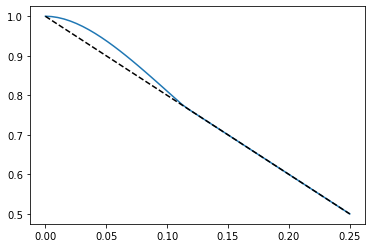

In [7]:
r5 = gen_ring_graph(5)
m = Pauli(z_ix=[0], x_ix=[], n=5)
print(m.to_str())
checks = best_checks_max_clique(r5, m, spc=False)
# checks = [Pauli(x_ix=[1], z_ix=[0, 2], n=5), Pauli(x_ix=[4], z_ix=[0, 3], n=5)]
print([c.to_str() for c in checks])
prob, conf = pauli_error_decoder([m], checks, ps, ignore=[])
print(prob)
plt.plot(ps, prob)
plt.plot(ps, (1-2*ps), 'k--')

In [8]:
# iterate over all n qubit graphs


In [9]:
def is_error_tolerant_multiple_bases(edge_list, printing=False, plot=False):
    ps = np.linspace(0.0001, 0.25)
    g = Graph()
    g.add_nodes_from(list(range(max([nod for edge in edge_list for nod in edge]))))
    g.add_edges_from(edge_list)

    ec_flags = {'x': False, 'y': False, 'z': False}
    for basis in ['x', 'y', 'z']:
        g_decoder = CascadeDecoder(g)
        t, m1, s1, s2 = g_decoder.decode(get_first_strat=True, first_traversal=True, mc=True, eff_meas_basis=basis, pathfinding=False)
        checks = best_checks_max_clique(g, m1)
        prob, conf = pauli_error_decoder([m1], checks, ps)
        if printing:
            print(m1.to_str())
            print([c.to_str() for c in checks])

        # Check if error is surpressed
        for i in range(len(ps)):
            if prob[i] > (1 - 2 * ps[i]) * (1.01):  # Require at least 1% better (avoid machine precision errors)
                ec_flags[basis] = True
                # print(prob[i], ps[i])
                break
        if plot:
            plt.plot(1 - 2 * ps, prob)
            plt.plot(1 - 2 * ps, 1 - 2 * ps, 'k--')
            plt.show()
    return ec_flags






In [16]:
def ec_graph_search(n):
    graphs = load_obj(f"{n}_qubit_graphs_ordered_num_in_class", path=getcwd()+'/data/uib_data')
    found = False
    i = 0
    for g5 in tqdm(reversed(graphs)):
        i += 1
        edge_list = g5[1]
        out = is_error_tolerant_multiple_bases(edge_list)
        if sum(out.values()) > 1:
            print(edge_list, out)
            found = True
            # break
            print(i)
            draw_graph(edge_list, from_edges=True)
    print(f"{found=}")

In [17]:
def mp_ec_graph_search(n):
    pass

2it [00:11,  5.79s/it]

[(0, 1), (0, 2), (0, 3), (1, 5), (1, 6), (2, 7), (2, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7)] {'x': True, 'y': True, 'z': True}
3


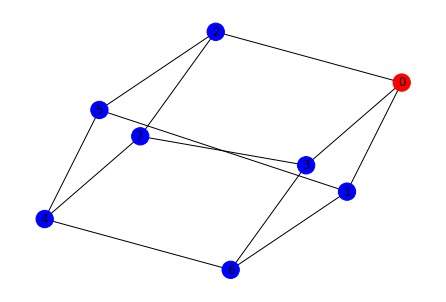

78it [03:59,  3.07s/it]


KeyboardInterrupt: 

In [18]:
for nq in range(4, 9):
    ec_graph_search(nq)

In [ ]:
n = 7
graphs = load_obj(f"{n}_qubit_graphs_ordered_num_in_class", path=getcwd()+'/data/uib_data')
culprit = graphs[108][1]
g = Graph()
g.add_nodes_from(list(range(max([nod for edge in culprit for nod in edge]))))
g.add_edges_from(culprit)
draw_graph(g)

## 10 and 11 qubit graphs have been analysed for error correction abilities in MBQEC on blue crystal
## see if any were error correcting in multiple bases



In [9]:
def succ_prob(dict, eta):
    return sum([dict[k] * eta ** sum(k[0::3]) * (1 - eta) ** sum(k[2::3]) for k in dict.keys()])
etas = np.linspace(0, 1)

FOUND
Batch 7 graph 819


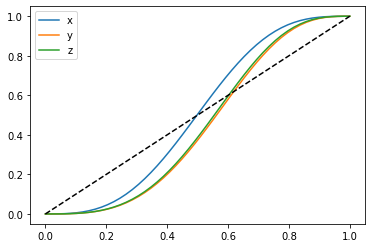

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


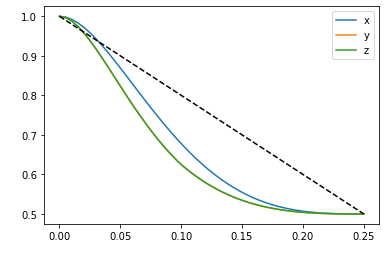

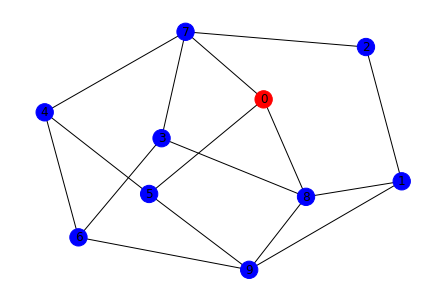

FOUND
Batch 7 graph 821


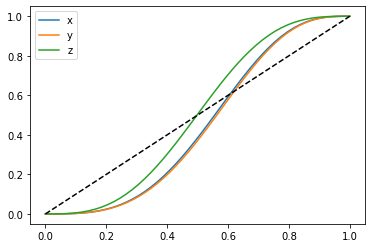

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


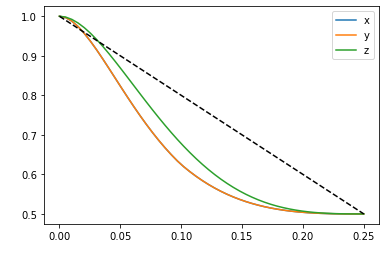

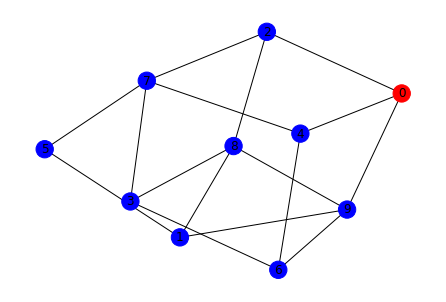

FOUND
Batch 13 graph 483


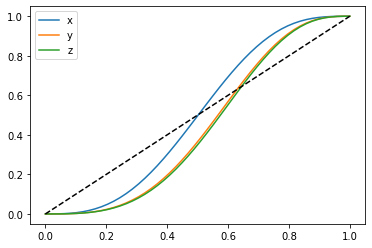

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


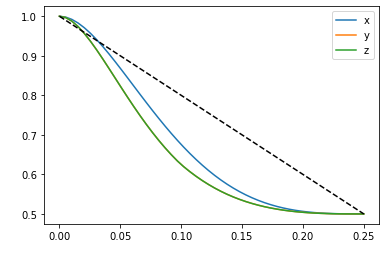

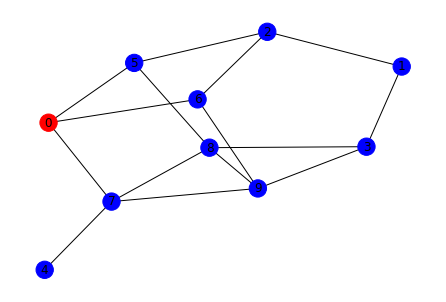

FOUND
Batch 16 graph 56


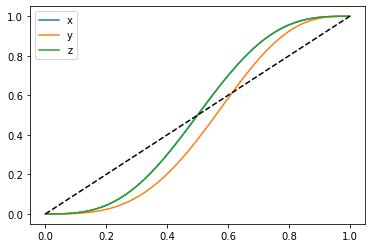

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


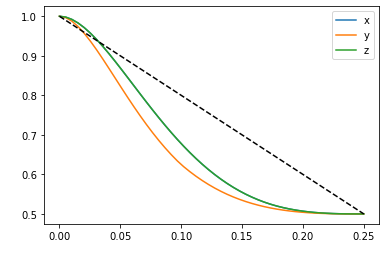

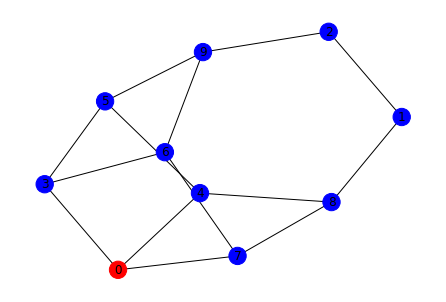

FOUND
Batch 16 graph 57


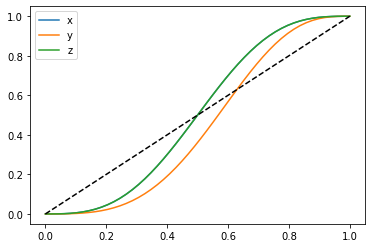

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


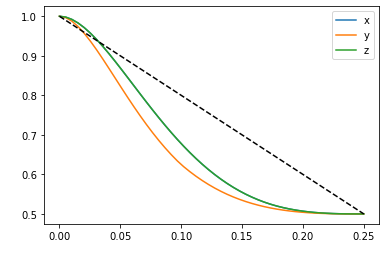

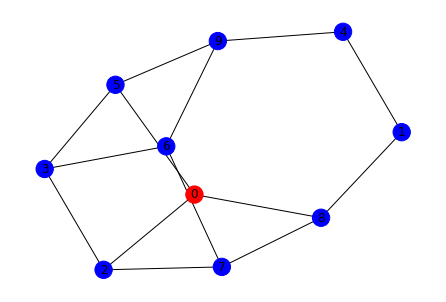

FOUND
Batch 18 graph 729


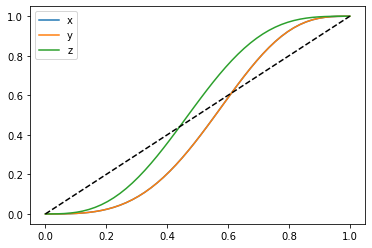

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


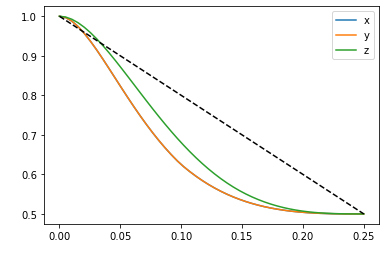

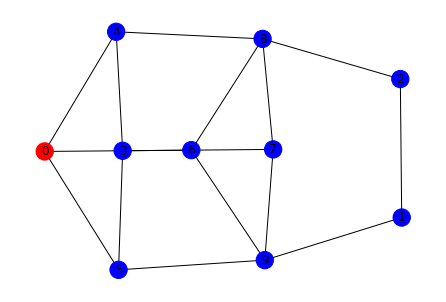

FOUND
Batch 18 graph 730


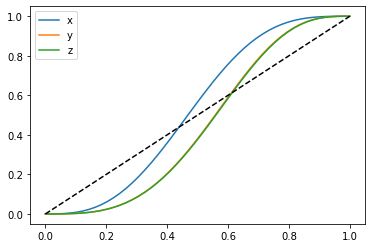

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


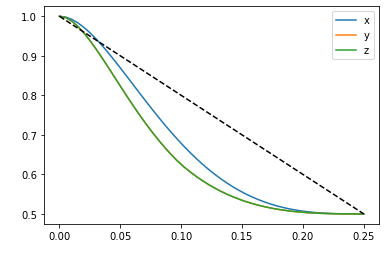

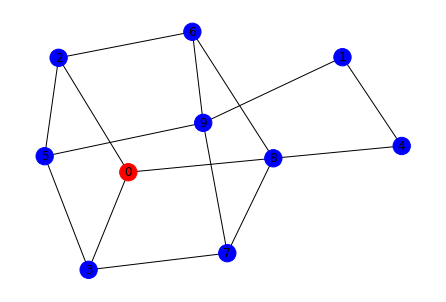

FOUND
Batch 18 graph 731


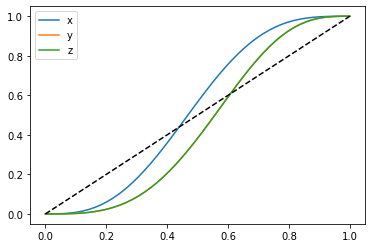

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


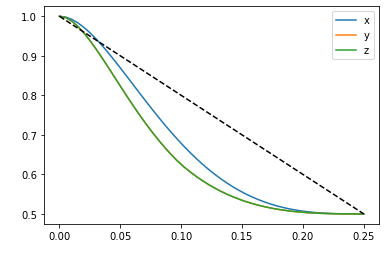

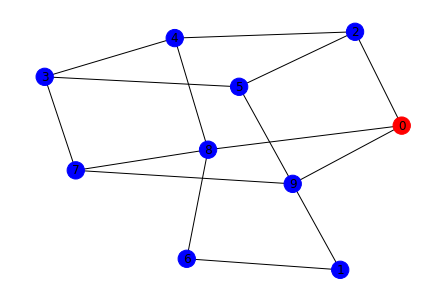

FOUND
Batch 20 graph 193


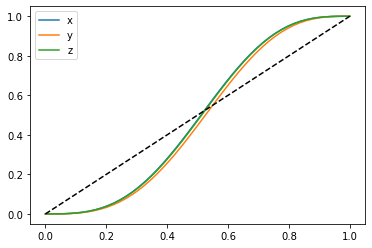

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


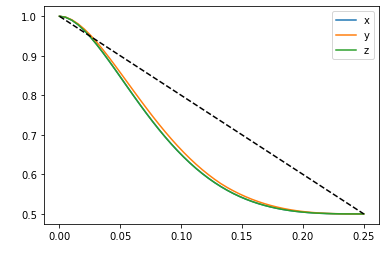

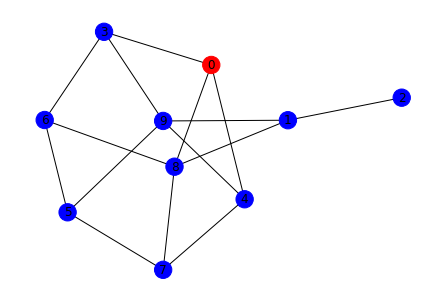

FOUND
Batch 23 graph 343


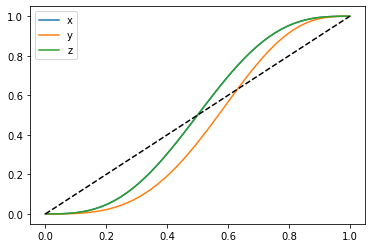

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


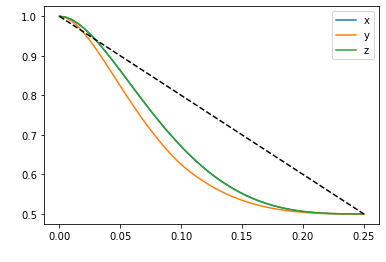

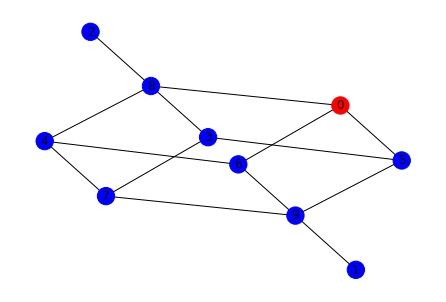

FOUND
Batch 23 graph 683


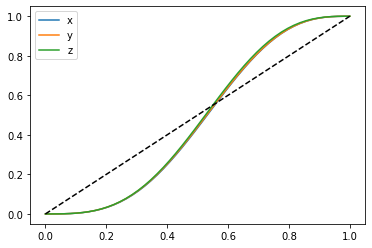

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


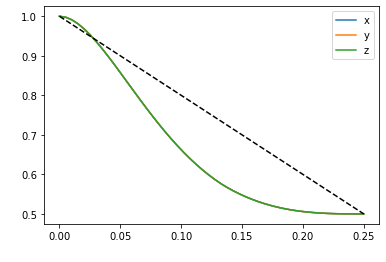

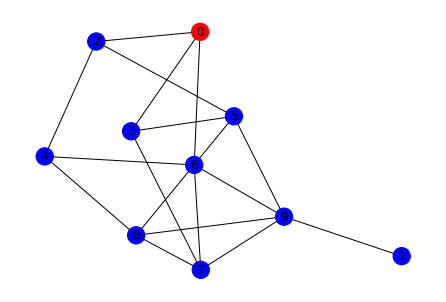

FOUND
Batch 23 graph 684


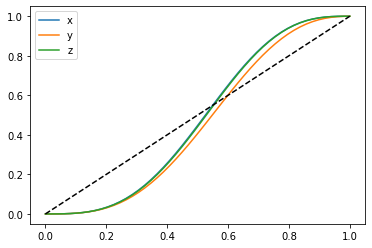

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


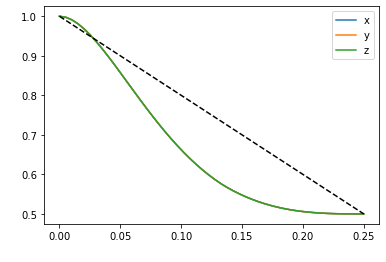

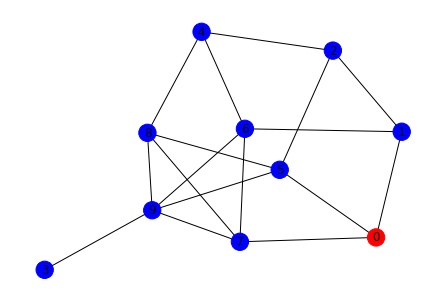

FOUND
Batch 23 graph 685


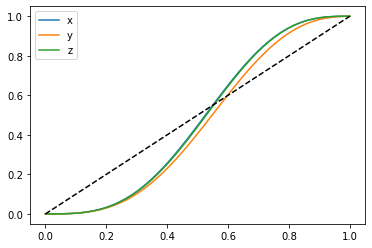

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


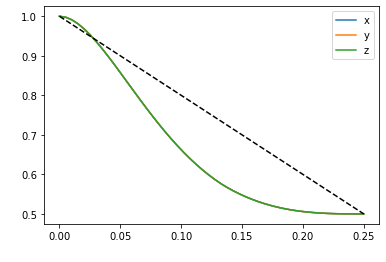

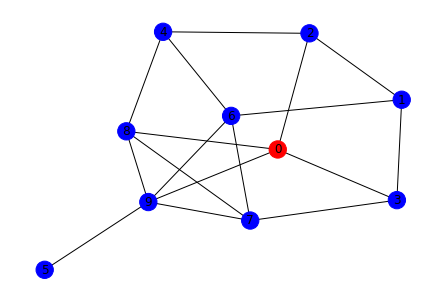

FOUND
Batch 23 graph 686


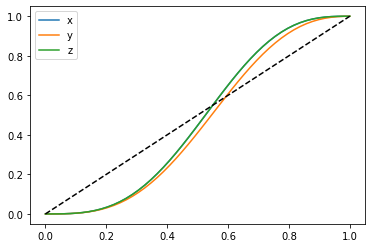

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


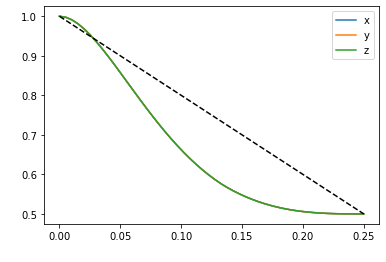

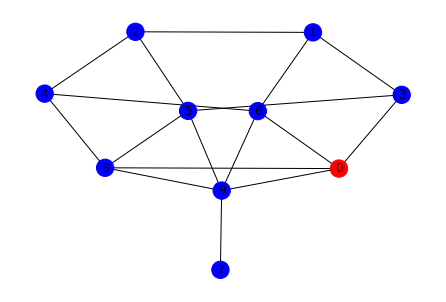

FOUND
Batch 24 graph 85


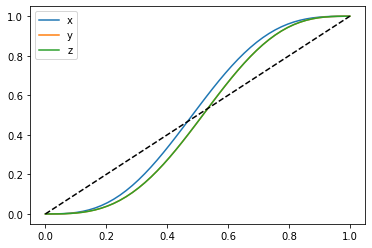

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


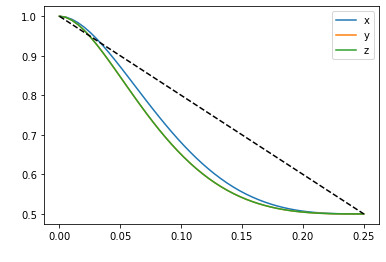

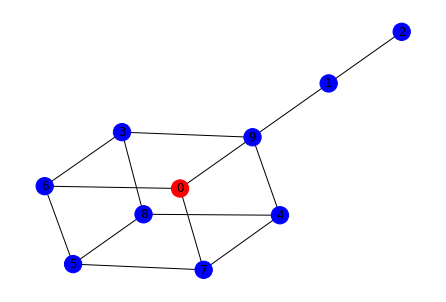

FOUND
Batch 24 graph 86


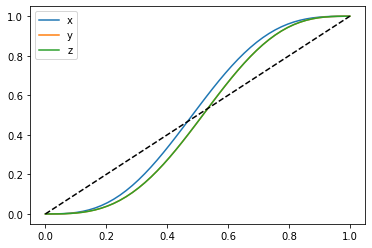

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


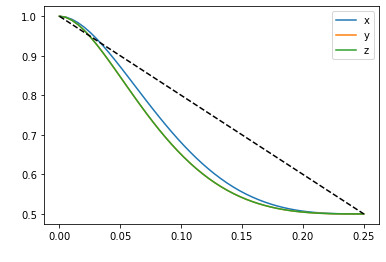

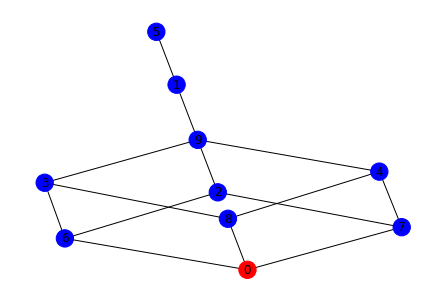

FOUND
Batch 24 graph 87


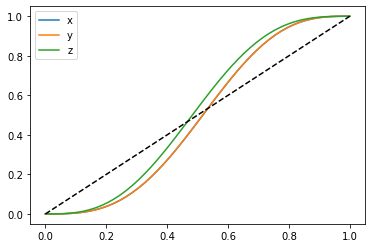

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


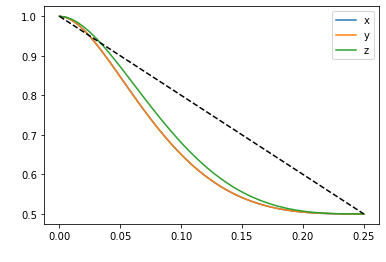

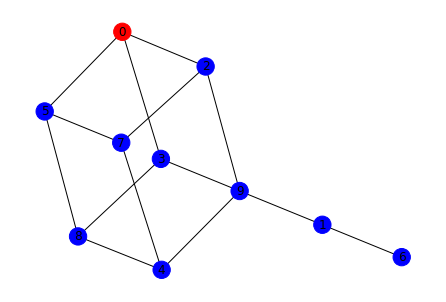

FOUND
Batch 24 graph 110


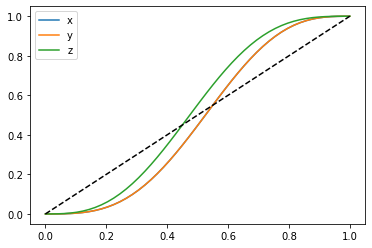

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


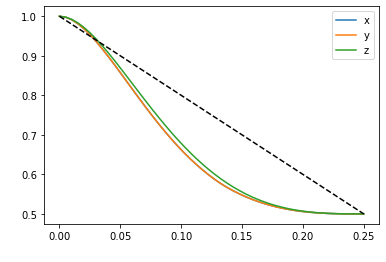

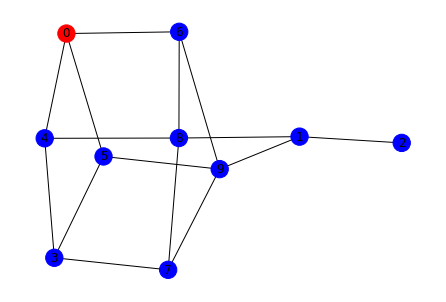

FOUND
Batch 24 graph 111


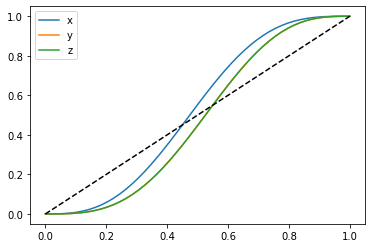

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


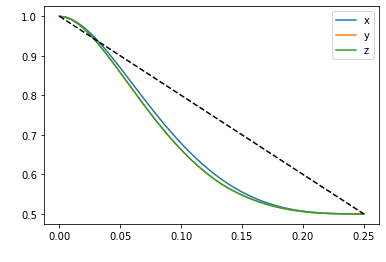

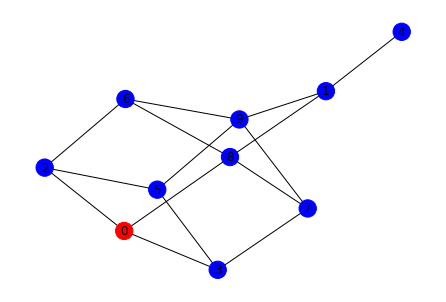

FOUND
Batch 24 graph 112


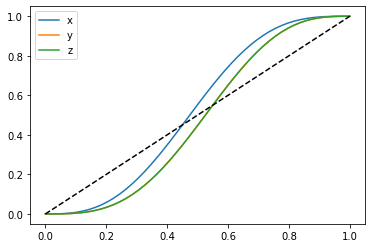

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


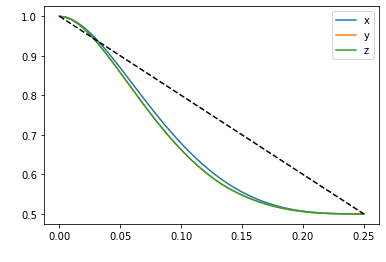

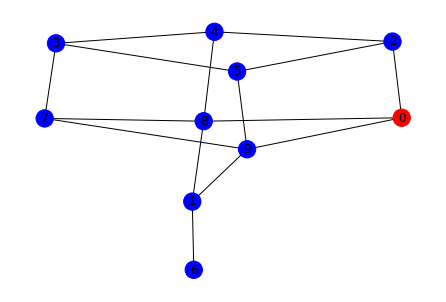

FOUND
Batch 24 graph 113


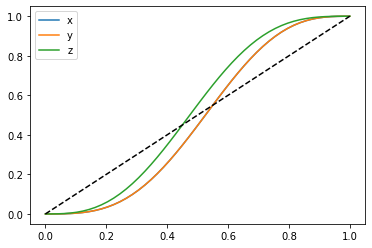

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


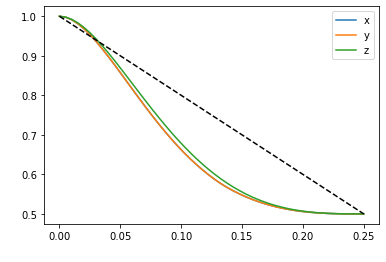

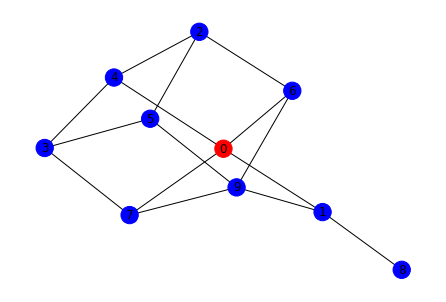

FOUND
Batch 24 graph 121


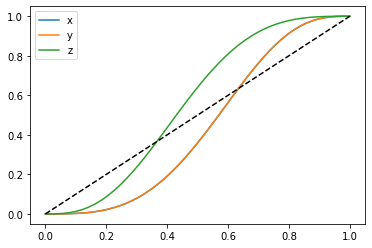

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


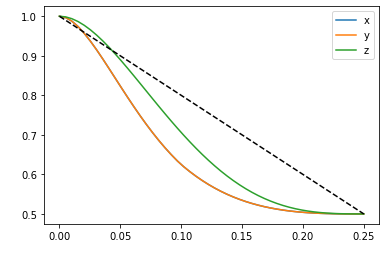

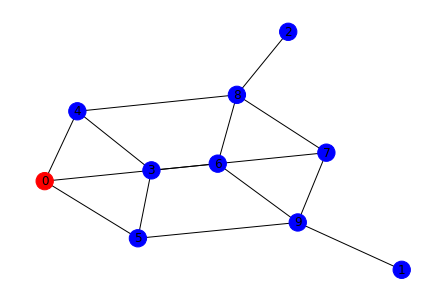

FOUND
Batch 24 graph 122


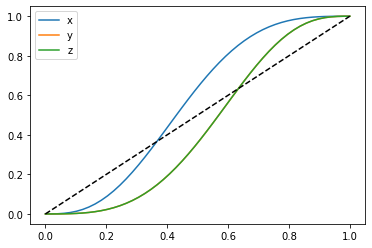

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


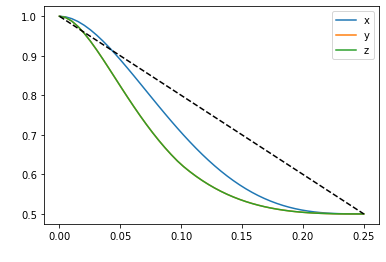

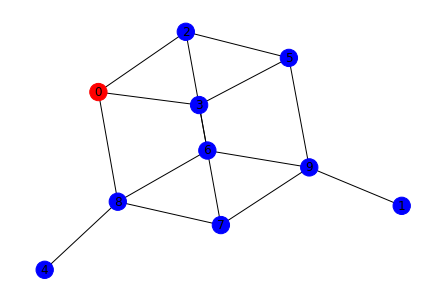

FOUND
Batch 24 graph 123


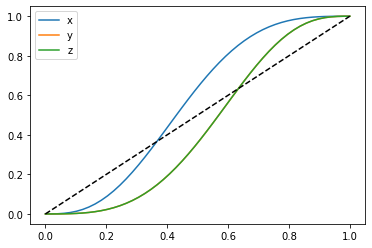

C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}
C:\Users\ip19160\PycharmProjects\LTdecode\error_correction.py:170: RuntimeWarning: invalid value encountered in double_scalars
  confidences_dict = {k: v/synd_tot_probs[syndrome] for k, v in syndrome_prob_dicts[syndrome].items()}


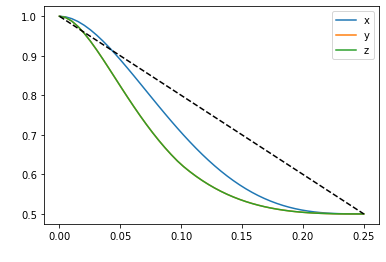

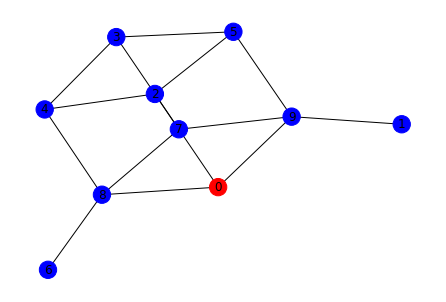

In [11]:
nq = 10
if nq == 10:
    tot_batch = 26
elif nq == 11:
    tot_batch = 81
else:
    raise ValueError
for ix in range(tot_batch):
    graph_ec_perf = load_obj(f'graph_performance_pauli_ec_batch{ix}', path=f'graphs_batched_{nq}q')
    j = 0
    for g in graph_ec_perf:
        if sum(g.values()) > 2:
            # If they are error-tolerant, look at their loss tolerance
            ec_g = load_obj(f'graph_performance_pauli_batch{ix}', f'graphs_batched_{nq}q')[j]

            lt_bases = [False, False, False]
            for i in range(3):
                # print(g[i+1])
                eta_log = [succ_prob(ec_g[i + 1], t) for t in etas]
                # plt.plot(etas, eta_log)
                # plt.plot(etas, etas, 'k--')
                # plt.show()
                for k in range(len(etas)):
                    if eta_log[k] > etas[k] * 1.0001:
                        lt_bases[i] = True
            if sum(lt_bases) == 3:
                print('FOUND')
                print(f'Batch {ix} graph {j}')
                for i in range(3):
                    eta_log = [succ_prob(ec_g[i + 1], t) for t in etas]
                    plt.plot(etas, eta_log)
                plt.plot(etas, etas, 'k--')
                plt.legend(bases)
                plt.show()
                for b in bases:
                    plot_ec_graph(ec_g[0], b, show=False)
                plt.legend(bases)
                plt.plot(ps, (1-2*ps), 'k--')

                plt.show()
                draw_graph(ec_g[0], from_edges=True)
        j += 1



## Write functionality to generate contour plots of when these graphs outperform direct transmission


In [ ]:
from helpers import bisection_search

def noise_loss_sweep(nq, batch, j, basis='x', n_points=10, dec=None):
    etas = np.linspace(0.5, 1, n_points)
    noises = np.linspace(0.000001, 0.25, 10)
    thresh = []

    if dec is None:
        pauli_perf = load_obj(f'graph_performance_pauli_batch{batch}', f'graphs_batched_{nq}q')[j]
        edges = pauli_perf[0]
        prs = pauli_perf[1:]
        graph = Graph()
        graph.add_nodes_from(list(range(max([a for b in edges for a in b]))))
        graph.add_edges_from(edges)
        draw_graph(graph)
        dec = CascadeDecoder(graph)
        dec.build_tree(basis, ec=True, cascading=False)
        print(dec.success_prob_outcome_list(0.6, 0, 'x', ec=True))
    # for eta in etas:
    #     # for noise in noises:
    #     #     prob, acc = dec.success_prob_outcome_list(eta, 2 * noise, basis=basis, ec=True)
    #     #     tot = prob * acc
    #     #     print(f'{prob=}, {acc=}, {tot=}')
    #     #     print(f'{eta=}, {noise=}, ' + str(eta * (1 - 2*noise)))
    #
    #     def func(epsilon):
    #         prob, acc = dec.success_prob_outcome_list(eta, 2 * epsilon, basis=basis, ec=True)
    #         print('logical: ', prob, acc)
    #         print('physical: ', eta, 1 - 2 * epsilon)
    #         return prob * acc - eta * (1 - 2 * epsilon)
    #     try:
    #         thresh.append(bisection_search([0., 0.05], func))
    #     except ValueError:
    #         print('no_root')
    #         thresh.append(0)
    # plt.plot(etas, thresh)
    # plt.show()


In [ ]:
noise_loss_sweep(10, 24, 113)


In [ ]:
noise_loss_sweep(10, 24, 48)

In [ ]:
batch = 24
j = 113
n_points = 10
basis = 'x'
etas = np.linspace(0.5, 1, n_points)
noises = np.linspace(0.000001, 0.25, 10)
thresh = []

pauli_perf = load_obj(f'graph_performance_pauli_batch{batch}', f'graphs_batched_{nq}q')[j]
edges = pauli_perf[0]
prs = pauli_perf[1:]
graph = Graph()
graph.add_nodes_from(list(range(max([a for b in edges for a in b]))))
graph.add_edges_from(edges)
draw_graph(graph)
dec = CascadeDecoder(graph)
dec.build_tree(basis, ec=True, cascading=False)
print(dec.success_prob_outcome_list(0.6, 0, 'x', ec=True))

In [ ]:
for eta in etas:
    # for noise in noises:
    #     prob, acc = dec.success_prob_outcome_list(eta, 2 * noise, basis=basis, ec=True)
    #     tot = prob * acc
    #     print(f'{prob=}, {acc=}, {tot=}')
    #     print(f'{eta=}, {noise=}, ' + str(eta * (1 - 2*noise)))

    def func(epsilon):
        prob, acc = dec.success_prob_outcome_list(eta, 2 * epsilon, basis=basis, ec=True)
        print('logical: ', prob, acc)
        print('physical: ', eta, 1 - 2 * epsilon)
        return prob * acc - eta * (1 - 2 * epsilon)
    try:
        thresh.append(bisection_search([0., 0.05], func))
    except ValueError:
        print('no_root')
        thresh.append(0)
plt.plot(etas, thresh)
plt.show()

In [ ]:
ix = 24
j = 122
g = load_obj(f'graph_data_batch{ix}', 'graphs_batched_10q')[j]
draw_graph(g[1], from_edges=True)
print(g[1])


# Consider graphs which are Loss-Tolerant in multiple bases, and see if any are error-correcting

In [ ]:
def succ_prob(dict, eta):
    return sum([dict[k] * eta ** sum(k[0::3]) * (1 - eta) ** sum(k[2::3]) for k in dict.keys()])

In [ ]:
etas = np.linspace(0, 1)
def get_2LT_bases_graphs(n):
    out = []
    graphs = load_obj(f'{n}_qubit_performance', path='data/pauli_data')
    for g in tqdm(graphs):
        lt_bases = [False, False, False]
        for i in range(3):
            # print(g[i+1])
            eta_log = [succ_prob(g[i + 1], t) for t in etas]
            # plt.plot(etas, eta_log)
            # plt.plot(etas, etas, 'k--')
            # plt.show()
            for j in range(len(etas)):
                if eta_log[j] > etas[j] * 1.0001:
                    lt_bases[i] = True
        if sum(lt_bases) > 1:
            out.append((g, lt_bases))
            ec_props = is_error_tolerant_multiple_bases(g[0])
            if sum(ec_props.values()) > 1:
                print("FOUND!!")
                graph = Graph()
                graph.add_edges_from(g[0])
                draw_graph(graph)
                return g
    return False

In [ ]:
n=8
multi_lt_pauli_n = get_2LT_bases_graphs(n)
print(multi_lt_pauli_n)
# for g in multi_lt_pauli_n:
#     print(g[1])
#     graph = Graph()
#     graph.add_edges_from(g[0][0])
#     draw_graph(graph)

In [ ]:
graphs = load_obj(f'{8}_qubit_performance', path='data/pauli_data')
lt_bases = [False, False, False]

x = graphs[402]
graph = Graph()
graph.add_edges_from(x[0])
draw_graph(graph)
for i in range(3):
    # print(g[i+1])
    eta_log = [succ_prob(x[i + 1], t) for t in etas]
    plt.plot(etas, eta_log)
    plt.plot(etas, etas, 'k--')
    plt.show()
    for j in range(len(etas)):
        if eta_log[j] > etas[j] * 1.0001:
            print(eta_log[j], etas[j])
            lt_bases[i] = True
print(sum(lt_bases))

In [ ]:
from networkx.algorithms.clique import find_cliques as maximal_cliques
g = Graph()
g.add_nodes_from([0, 1])
print([x for x in maximal_cliques(g)])

In [2]:
def tst_func(a, b, c, eta):
    return eta ** a * (1-eta) ** b * c



In [21]:
params = [(3, 0, 1), (3, 1, 2), (3, 2, 3), (3, 3, 2), (4, 1, 1), (4, 2, 4), (4, 3, 6), (5, 3, 3), (5, 4, 7), (4, 4, 3)]

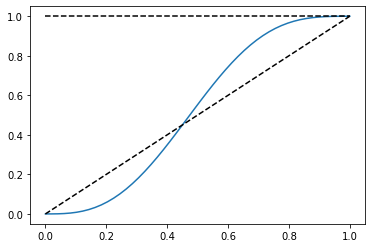

In [22]:
etas = np.linspace(0, 1)
log = []
for eta in etas:
    x = sum([tst_func(a[0], a[1], a[2], eta) for a in params])
    log.append(x)

plt.plot(etas, log)
plt.plot(etas, etas, 'k--')
plt.plot([0, 1], [1, 1], 'k--')
plt.show()

## Test the cube graph to see the measurement support in different bases

[(0, 1), (0, 4), (0, 6), (0, 7), (1, 8), (1, 9), (2, 5), (2, 6), (2, 4), (3, 7), (3, 5), (3, 4), (5, 9), (6, 9), (7, 9)]


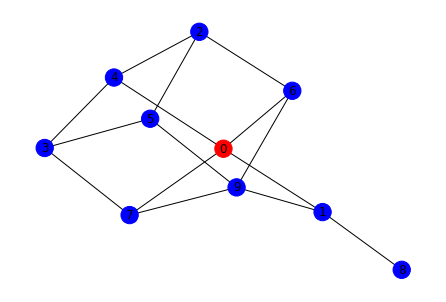

dsj=False


In [10]:
nq = 10

batch = 24
j = 113
n_points = 20
bases = ['z']
etas = np.linspace(0.4, 0.9999, n_points)
noises = np.linspace(0.000001, 0.05, 10)


pauli_perf = load_obj(f'graph_performance_pauli_batch{batch}', f'graphs_batched_{nq}q')[j]
edges = pauli_perf[0]
print(edges)
graph = Graph()
graph.add_nodes_from(list(range(nq)))
graph.add_edges_from(edges)
draw_graph(graph)


from stab_formalism import stabilizers_from_graph, gen_logicals_from_stab_grp, gen_stabs_from_generators


stab_generators = stabilizers_from_graph(graph)
stab_grp_t, stab_grp_nt = gen_stabs_from_generators(stab_generators, split_triviality=True)

a = [2, 3, 8, 9]
b = [1, 4, 5, 6, 7]
tx = Pauli(z_ix=b, x_ix=a, n=nq)
tz = Pauli(z_ix=a, x_ix=b, n=nq)

paulis = gen_logicals_from_stab_grp(stab_grp_nt, nq)
xlog = paulis[0]
zlog = paulis[1]

xlog_comp_supp = [set(p.support) for p in xlog if p.commutes_every(tx)]
zlog_comp_supp = [set(p.support) for p in zlog if p.commutes_every(tz)]

dsj = False
for x in xlog_comp_supp:
    for z in zlog_comp_supp:
        if not x.intersection(z):
            print(f'disjoint sets found, {x=}, {z=}')
            djs = True
print(f'{dsj=}')

## Would expect the cube graph to be error-correcting and loss tolerant in x and z bases - check this

Z1_Z3_Z7
['Z1_Z3_Z5_X2', 'Z1_Z5_Z7_X4', 'Z3_Z5_Z7_X6']


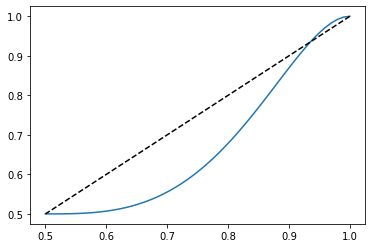

Z4_Z6_Z7_X4_X6_X7
['-_Z1_Z2_Z3_Z5_X1_X2_X3_X5', 'Z1_Z2_Z6_Z7_X1_X2_X6_X7', 'Z1_Z3_Z4_Z6_X1_X3_X4_X6']


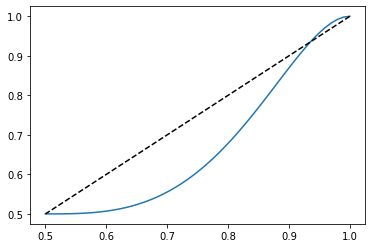

Z4_Z6_X7
['Z2_Z4_Z6_X5', 'Z4_Z6_X1_X3', 'Z2_Z6_X1_X7']


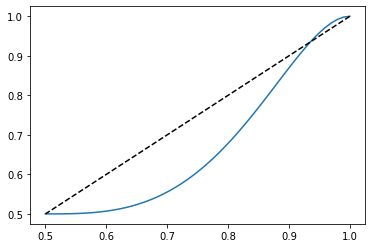

{'x': True, 'y': True, 'z': True}


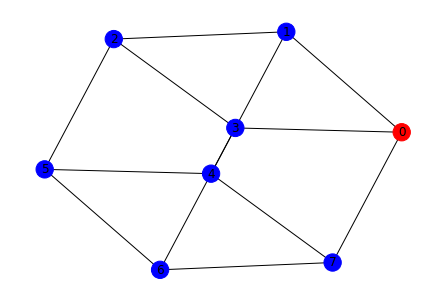

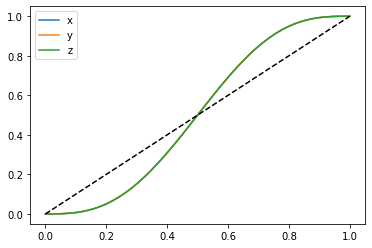

In [13]:
etas = np.linspace(0, 1)
g = Graph()
g.add_nodes_from(list(range(8)))
cube_edges=[(0, 1), (0, 3), (0, 7), (1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (4, 7), (5, 6), (6, 7)]
print(is_error_tolerant_multiple_bases(cube_edges, printing=True, plot=True))
g.add_edges_from(cube_edges)
draw_graph(g)
dec = CascadeDecoder(g)
for b in bases:
    dec.build_tree(b, ec=False, printing=False, cascading=False)
    plt.plot(etas, [dec.success_prob_outcome_list(eta, 0, b, ec=False) for eta in etas])
plt.plot(etas, etas, 'k--')
plt.legend(bases)
plt.show()




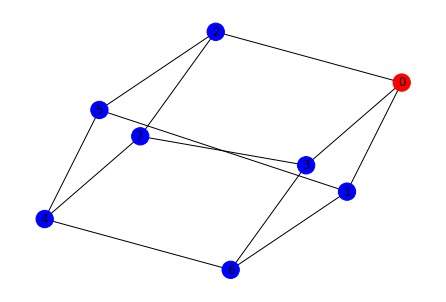

In [11]:
draw_graph([(0, 1), (0, 2), (0, 3), (1, 5), (1, 6), (2, 7), (2, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7)], from_edges=True)


## The 3,2 tree is the progenitor graph for the Shor code - check it's performance

NEW METHOD


100%|██████████| 1023/1023 [00:12<00:00, 79.29it/s]


Z1_Z2_Z3
['Z1_X4', 'Z1_X5', 'Z2_X6', 'Z2_X7', 'Z3_X8', 'X8_X9']


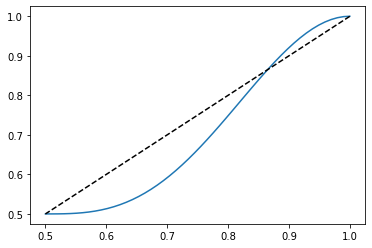

NEW METHOD


100%|██████████| 1023/1023 [00:12<00:00, 85.14it/s]


Z1_Z2_Z3_Z8_Z9_X3
['Z1_X4', 'Z1_X5', 'Z2_X6', 'Z2_X7']


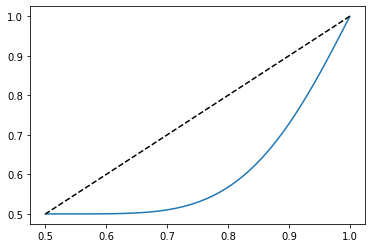

NEW METHOD


100%|██████████| 1023/1023 [00:12<00:00, 83.88it/s]


Z8_Z9_X3
['Z4_Z5_Z8_Z9_X1_X3', 'Z4_Z5_Z6_Z7_X1_X2']


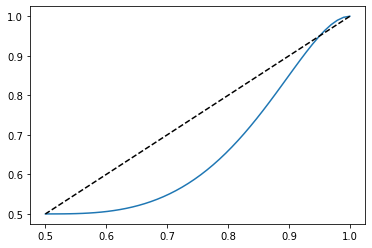

{'x': True, 'y': False, 'z': True}


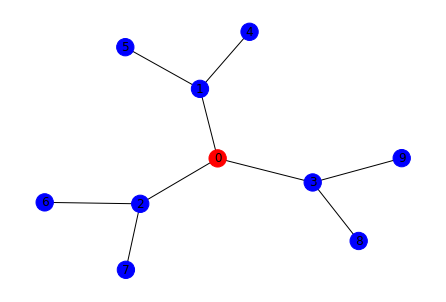

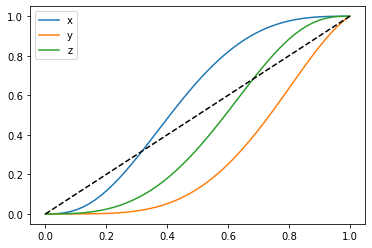

In [10]:
from graphs import gen_star_graph, gen_cascaded_graph
casc_g = gen_cascaded_graph([gen_star_graph(4), gen_star_graph(3)])
g = casc_g[0]
print(is_error_tolerant_multiple_bases(g.edges, printing=True, plot=True))

draw_graph(g)
dec = CascadeDecoder(g)
for b in bases:
    dec.build_tree(b, ec=False, printing=False, cascading=False)
    plt.plot(etas, [dec.success_prob_outcome_list(eta, 0, b, ec=False) for eta in etas])
plt.plot(etas, etas, 'k--')
plt.legend(bases)
plt.show()

## determine if the Steane code is also error-mitigating in teleportation.
In this case we need to see if it wins if we ignore errors in the output qubit


In [7]:
def is_error_tolerant_teleportation(edge_list, printing=False, plot=False):
    ps = np.linspace(0.0001, 0.25)
    g = Graph()
    g.add_nodes_from(list(range(max([nod for edge in edge_list for nod in edge]))))
    g.add_edges_from(edge_list)
    ec_flag = False

    g_decoder = CascadeDecoder(g)
    t, m1, s1, s2 = g_decoder.decode(get_first_strat=True, first_traversal=True, mc=True, eff_meas_basis='spc', pathfinding=True)
    checks = best_checks_max_clique(g, m1)
    prob, conf = pauli_error_decoder([s1, s2], checks, ps, ignore=(0,))
    if printing:
        print(m1.to_str())
        print([c.to_str() for c in checks])

    # Check if error is surpressed
    for i in range(len(ps)):
        if prob[i] > (1 - 2 * ps[i]) * (1.01):  # Require at least 1% better (avoid machine precision errors)
            ec_flag = True
            # print(prob[i], ps[i])
            break
    if plot:
        plt.plot(1 - 2 * ps, prob)
        plt.plot(1 - 2 * ps, 1 - 2 * ps, 'k--')
        plt.show()
    return ec_flag

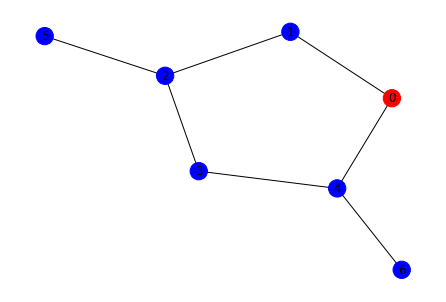

True


In [8]:
alien = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (2, 5), (4, 6)]
draw_graph(alien, from_edges=True)
print(is_error_tolerant_teleportation(alien))

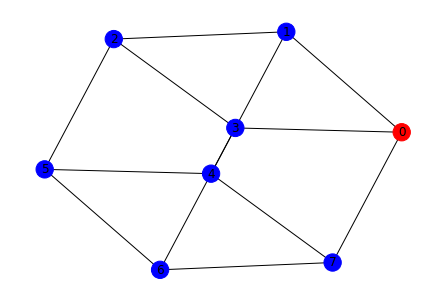

False


In [12]:
cube_edges = [(0, 1), (0, 3), (0, 7), (1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (4, 7), (5, 6), (6, 7)]
draw_graph(cube_edges, from_edges=True)
print(is_error_tolerant_teleportation(cube_edges))


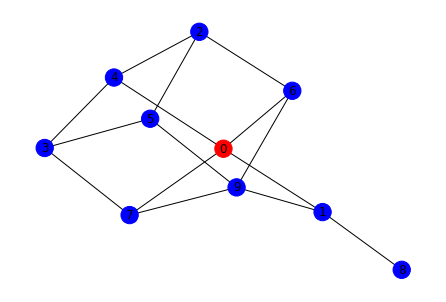

False


In [13]:
nq = 10
batch = 24
j = 113
pauli_perf = load_obj(f'graph_performance_pauli_batch{batch}', f'graphs_batched_{nq}q')[j]
edges = pauli_perf[0]
draw_graph(edges, from_edges=True)
print(is_error_tolerant_teleportation(edges))


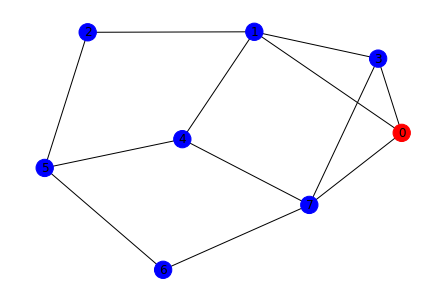

True


In [17]:
cube_edges_ = [(0, 1), (0, 3), (0, 7), (1, 2), (1, 4), (1, 3), (2, 5), (3, 7), (4, 5), (4, 7), (5, 6), (6, 7)]
draw_graph(cube_edges_, from_edges=True)
print(is_error_tolerant_teleportation(cube_edges_))

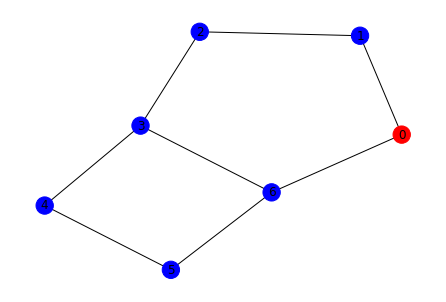

Z2_Z6
['Z2_Z4_Z6_X3', 'Z4_Z6_X5']
False


In [20]:
es = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (0, 6), (3, 6)]
draw_graph(es, from_edges=True)
print(is_error_tolerant_teleportation(es, printing=True))